In [1]:
!git clone https://github.com/YutongLei2020/CS-172B-Project.git
%cd ./CS-172B-Project/

Cloning into 'CS-172B-Project'...
remote: Enumerating objects: 34081, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 34081 (delta 10), reused 3 (delta 1), pack-reused 34058
Receiving objects: 100% (34081/34081), 58.04 MiB | 21.77 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Updating files: 100% (35896/35896), done.
/content/CS-172B-Project


In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
# gpuid = 0 # An index of which gpu to use. 
# os.environ['KERAS_BACKEND'] = 'tensorflow'
# os.environ['CUDA_VISIBLE_DEVICES'] = "{}".format(gpuid) # (Empty) List of gpu indices that TF can see.
from keras import backend as K
import keras
import tensorflow as tf
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.regularizers import l2
import load_images_colab

In [3]:
X_train, Y_train, X_validation, Y_validation, X_test, Y_test = load_images_colab.getRGBDataset()

In [22]:
base_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(48, 48, 3),
    include_top=False)
# print(len(base_model.layers)) # 190 layers
# only freeze 0-178 layers
# for layer in base_model.layers[:152]:
#     layer.trainable = False

# for i,layer in enumerate(base_model.layers):
#     print(i,layer.name,'-',layer.trainable)

In [28]:
model = Sequential()
model.add(base_model)

model.add(Flatten())
model.add(BatchNormalization())

model.add(Dense(1024,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 2, 2, 2048)        23564800  
                                                                 
 flatten_4 (Flatten)         (None, 8192)              0         
                                                                 
 batch_normalization_12 (Bat  (None, 8192)             32768     
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 512)               4194816   
                                                                 
 batch_normalization_13 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 512)              

In [35]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    optimizer= Adam(learning_rate=0.0001), 
    metrics=['accuracy']
)
# earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=0, mode='max')
mcp_save = ModelCheckpoint(filepath = 'models/resnet_CNN_model', 
        save_freq = 'epoch' ,
        save_best_only = True,
        monitor = 'val_loss',
        mode ='max')
reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=7, verbose=1, min_delta=1e-4, mode='min')

callbacks = [ mcp_save,reduce_lr_loss]

In [36]:
history = model.fit(X_train, Y_train,batch_size= 128,
                    epochs=100,verbose=1, validation_data=(X_validation, Y_validation),callbacks = callbacks)

Epoch 1/100
168/169 [============================>.] - ETA: 0s - loss: 1.2388 - accuracy: 0.5876

169/169 [==============================] - 65s 348ms/step - loss: 1.2396 - accuracy: 0.5876 - val_loss: 1.6972 - val_accuracy: 0.4899
Epoch 2/100
168/169 [============================>.] - ETA: 0s - loss: 1.0451 - accuracy: 0.6518

169/169 [==============================] - 64s 383ms/step - loss: 1.0454 - accuracy: 0.6519 - val_loss: 1.6733 - val_accuracy: 0.4937
Epoch 3/100
168/169 [============================>.] - ETA: 0s - loss: 0.8470 - accuracy: 0.7152

169/169 [==============================] - 56s 335ms/step - loss: 0.8469 - accuracy: 0.7152 - val_loss: 1.6857 - val_accuracy: 0.5087
Epoch 4/100
169/169 [==============================] - 17s 101ms/step - loss: 0.6840 - accuracy: 0.7664 - val_loss: 1.7546 - val_accuracy: 0.5016
Epoch 5/100
168/169 [============================>.] - ETA: 0s - loss: 0.5497 - accuracy: 0.8153

169/169 [==============================] - 61s 365ms/step - loss: 0.5499 - accuracy: 0.8152 - val_loss: 1.8437 - val_accuracy: 0.5147
Epoch 6/100
169/169 [==============================] - ETA: 0s - loss: 0.4256 - accuracy: 0.8581

169/169 [==============================] - 65s 387ms/step - loss: 0.4256 - accuracy: 0.8581 - val_loss: 1.8993 - val_accuracy: 0.5236
Epoch 7/100
169/169 [==============================] - 18s 108ms/step - loss: 0.3633 - accuracy: 0.8798 - val_loss: 1.9690 - val_accuracy: 0.5201
Epoch 8/100
168/169 [============================>.] - ETA: 0s - loss: 0.2781 - accuracy: 0.9097

169/169 [==============================] - 67s 400ms/step - loss: 0.2786 - accuracy: 0.9095 - val_loss: 2.0721 - val_accuracy: 0.5274
Epoch 9/100
169/169 [==============================] - 17s 99ms/step - loss: 0.2207 - accuracy: 0.9302 - val_loss: 2.0846 - val_accuracy: 0.5211
Epoch 10/100
168/169 [============================>.] - ETA: 0s - loss: 0.2172 - accuracy: 0.9310

169/169 [==============================] - 65s 389ms/step - loss: 0.2175 - accuracy: 0.9309 - val_loss: 2.1727 - val_accuracy: 0.5291
Epoch 11/100
168/169 [============================>.] - ETA: 0s - loss: 0.1666 - accuracy: 0.9481

169/169 [==============================] - 61s 364ms/step - loss: 0.1673 - accuracy: 0.9478 - val_loss: 2.2048 - val_accuracy: 0.5318
Epoch 12/100
169/169 [==============================] - 18s 109ms/step - loss: 0.1626 - accuracy: 0.9491 - val_loss: 2.2201 - val_accuracy: 0.5316
Epoch 13/100
169/169 [==============================] - 18s 109ms/step - loss: 0.1334 - accuracy: 0.9606 - val_loss: 2.2531 - val_accuracy: 0.5211
Epoch 14/100
168/169 [============================>.] - ETA: 0s - loss: 0.1246 - accuracy: 0.9623

169/169 [==============================] - 62s 367ms/step - loss: 0.1256 - accuracy: 0.9621 - val_loss: 2.3419 - val_accuracy: 0.5380
Epoch 15/100
169/169 [==============================] - 17s 99ms/step - loss: 0.1316 - accuracy: 0.9601 - val_loss: 2.3821 - val_accuracy: 0.5140
Epoch 16/100
169/169 [==============================] - 18s 108ms/step - loss: 0.1312 - accuracy: 0.9594 - val_loss: 2.3563 - val_accuracy: 0.5247
Epoch 17/100
169/169 [==============================] - 17s 101ms/step - loss: 0.1146 - accuracy: 0.9662 - val_loss: 2.4538 - val_accuracy: 0.5334
Epoch 18/100
169/169 [==============================] - 18s 107ms/step - loss: 0.1289 - accuracy: 0.9599 - val_loss: 2.4263 - val_accuracy: 0.5270
Epoch 19/100
169/169 [==============================] - 18s 106ms/step - loss: 0.1187 - accuracy: 0.9637 - val_loss: 2.4347 - val_accuracy: 0.5321
Epoch 20/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0949 - accuracy: 0.9723 - val_loss: 2.4559 - val_ac

169/169 [==============================] - 65s 387ms/step - loss: 0.0741 - accuracy: 0.9785 - val_loss: 2.4600 - val_accuracy: 0.5402
Epoch 22/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0812 - accuracy: 0.9762 - val_loss: 2.4566 - val_accuracy: 0.5359
Epoch 23/100
169/169 [==============================] - 18s 108ms/step - loss: 0.1020 - accuracy: 0.9695 - val_loss: 2.5228 - val_accuracy: 0.5286
Epoch 24/100
169/169 [==============================] - 18s 107ms/step - loss: 0.1337 - accuracy: 0.9573 - val_loss: 2.5519 - val_accuracy: 0.5281
Epoch 25/100
168/169 [============================>.] - ETA: 0s - loss: 0.1150 - accuracy: 0.9638

169/169 [==============================] - 62s 371ms/step - loss: 0.1165 - accuracy: 0.9635 - val_loss: 2.4997 - val_accuracy: 0.5406
Epoch 26/100
169/169 [==============================] - 17s 100ms/step - loss: 0.1321 - accuracy: 0.9586 - val_loss: 2.5358 - val_accuracy: 0.5356
Epoch 27/100
169/169 [==============================] - ETA: 0s - loss: 0.1089 - accuracy: 0.9644

169/169 [==============================] - 62s 370ms/step - loss: 0.1089 - accuracy: 0.9644 - val_loss: 2.5391 - val_accuracy: 0.5441
Epoch 28/100
169/169 [==============================] - 17s 102ms/step - loss: 0.0916 - accuracy: 0.9728 - val_loss: 2.5352 - val_accuracy: 0.5382
Epoch 29/100
169/169 [==============================] - 17s 102ms/step - loss: 0.0743 - accuracy: 0.9778 - val_loss: 2.5404 - val_accuracy: 0.5401
Epoch 30/100
169/169 [==============================] - 17s 101ms/step - loss: 0.0698 - accuracy: 0.9792 - val_loss: 2.5173 - val_accuracy: 0.5399
Epoch 31/100
168/169 [============================>.] - ETA: 0s - loss: 0.0729 - accuracy: 0.9782

169/169 [==============================] - 66s 391ms/step - loss: 0.0739 - accuracy: 0.9781 - val_loss: 2.5273 - val_accuracy: 0.5466
Epoch 32/100
168/169 [============================>.] - ETA: 0s - loss: 0.0699 - accuracy: 0.9793

169/169 [==============================] - 57s 341ms/step - loss: 0.0700 - accuracy: 0.9792 - val_loss: 2.5118 - val_accuracy: 0.5470
Epoch 33/100
169/169 [==============================] - 17s 101ms/step - loss: 0.0563 - accuracy: 0.9834 - val_loss: 2.5696 - val_accuracy: 0.5316
Epoch 34/100
169/169 [==============================] - 17s 102ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 2.5487 - val_accuracy: 0.5447
Epoch 35/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0590 - accuracy: 0.9833 - val_loss: 2.5361 - val_accuracy: 0.5435
Epoch 36/100
169/169 [==============================] - 18s 106ms/step - loss: 0.0740 - accuracy: 0.9789 - val_loss: 2.5572 - val_accuracy: 0.5420
Epoch 37/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0697 - accuracy: 0.9792 - val_loss: 2.6110 - val_accuracy: 0.5402
Epoch 38/100
168/169 [============================>.] - ETA: 0s - loss: 0.0748 - accuracy: 0.9769

169/169 [==============================] - 67s 396ms/step - loss: 0.0748 - accuracy: 0.9769 - val_loss: 2.6242 - val_accuracy: 0.5498
Epoch 39/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0668 - accuracy: 0.9802 - val_loss: 2.6242 - val_accuracy: 0.5313
Epoch 40/100
169/169 [==============================] - 18s 108ms/step - loss: 0.0575 - accuracy: 0.9829 - val_loss: 2.5904 - val_accuracy: 0.5483
Epoch 41/100
169/169 [==============================] - 17s 101ms/step - loss: 0.0582 - accuracy: 0.9822 - val_loss: 2.5691 - val_accuracy: 0.5433
Epoch 42/100
169/169 [==============================] - 17s 100ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 2.6174 - val_accuracy: 0.5477
Epoch 43/100
169/169 [==============================] - 18s 106ms/step - loss: 0.0748 - accuracy: 0.9775 - val_loss: 2.6351 - val_accuracy: 0.5399
Epoch 44/100
169/169 [==============================] - 17s 100ms/step - loss: 0.0812 - accuracy: 0.9761 - val_loss: 2.6299 - val_a

169/169 [==============================] - 62s 368ms/step - loss: 0.0671 - accuracy: 0.9789 - val_loss: 2.5980 - val_accuracy: 0.5511
Epoch 47/100
169/169 [==============================] - 17s 100ms/step - loss: 0.0623 - accuracy: 0.9810 - val_loss: 2.6148 - val_accuracy: 0.5448
Epoch 48/100
168/169 [============================>.] - ETA: 0s - loss: 0.0525 - accuracy: 0.9848

169/169 [==============================] - 62s 371ms/step - loss: 0.0532 - accuracy: 0.9847 - val_loss: 2.6265 - val_accuracy: 0.5548
Epoch 49/100
169/169 [==============================] - 17s 101ms/step - loss: 0.0725 - accuracy: 0.9785 - val_loss: 2.6390 - val_accuracy: 0.5458
Epoch 50/100
169/169 [==============================] - 18s 109ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 2.6450 - val_accuracy: 0.5438
Epoch 51/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0652 - accuracy: 0.9797 - val_loss: 2.6954 - val_accuracy: 0.5452
Epoch 52/100
169/169 [==============================] - 18s 107ms/step - loss: 0.0656 - accuracy: 0.9802 - val_loss: 2.5787 - val_accuracy: 0.5486
Epoch 53/100
169/169 [==============================] - 17s 99ms/step - loss: 0.0489 - accuracy: 0.9855 - val_loss: 2.5924 - val_accuracy: 0.5543
Epoch 54/100
169/169 [==============================] - 17s 101ms/step - loss: 0.0379 - accuracy: 0.9888 - val_loss: 2.5696 - val_ac

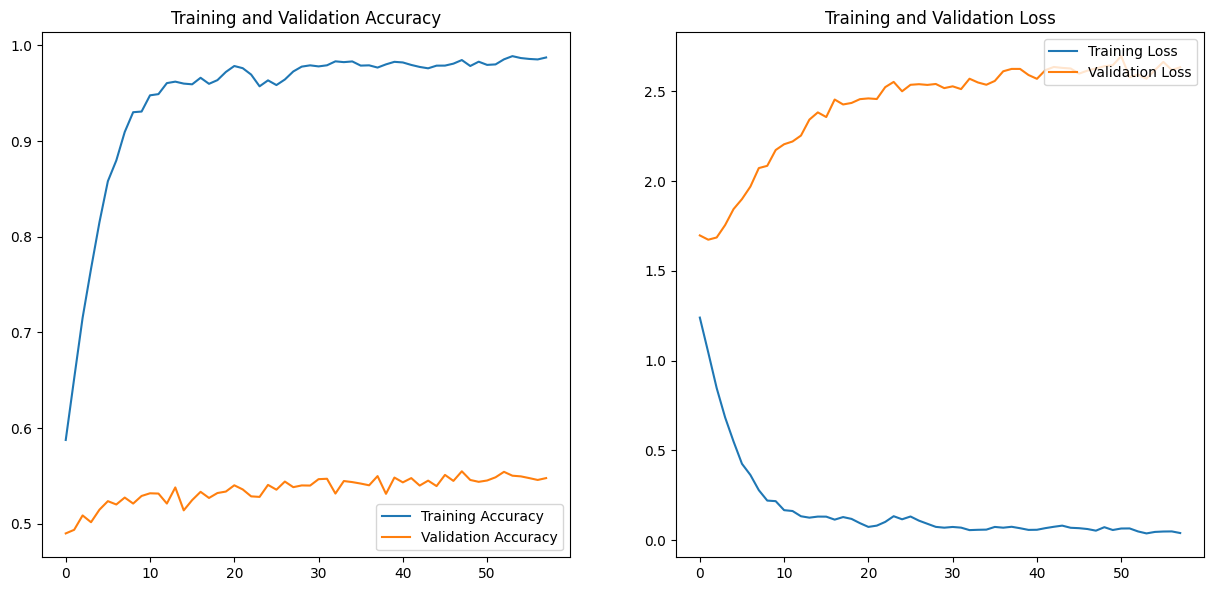

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(58)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
del(model)
model = load_model('models/resnet_CNN_model')
prediction = model.predict(X_test) # for each datapoint, gives a (1,7) vector contains probabilities

225/225 [==============================] - 3s 11ms/step


In [12]:
Y_prediction = np.argmax(prediction,axis = 1) # get the index(label) of highest probability for each testing datapoint
prediction_accuracy = np.mean(Y_prediction==Y_test)
print("The accuracy on test data is: ", prediction_accuracy)

The accuracy on test data is:  0.481471161883533


In [13]:
from sklearn.metrics import confusion_matrix, roc_auc_score,ConfusionMatrixDisplay

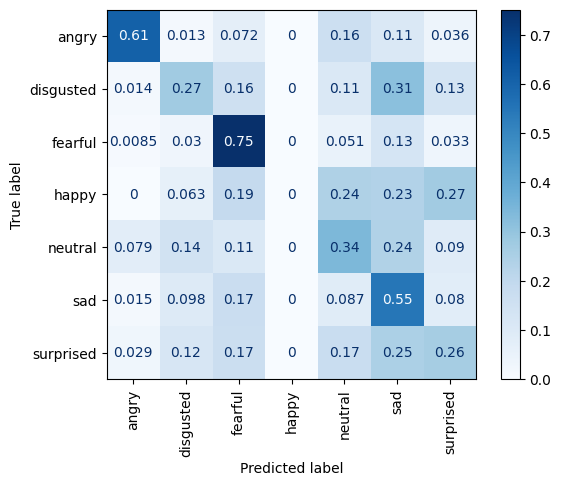

In [14]:
# confusion matrix
classes = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
cm = confusion_matrix(Y_test, Y_prediction, normalize= 'true')
disp = ConfusionMatrixDisplay(cm, display_labels = classes)
disp.plot(xticks_rotation = 'vertical',cmap=plt.cm.Blues)

In [ ]:
del(model)